In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from scipy.stats import iqr

import os

In [36]:
from lib.success_rate_N_estimation import get_N_success_rate, get_rho
from lib.exponential_fitting import fit_exponential_n, show_elbow_n
from lib.tools import filter_n, filter_r
from lib.projected_kernel import densities_2_kernel

In [ ]:
m=208

# FQ

## Kernel entries

In [38]:
path_2_k = 'results/sonar/linear/'

files_k = []
for file in os.listdir(path_2_k):
    if file.endswith('.csv'):
        files_k.append(os.path.join(path_2_k, file))
files_k.sort()

In [39]:
k_ZZ = []
for f in files_k:
    k_ZZ.append(pd.read_csv(f, header=None).to_numpy())
k_ZZ = np.array(k_ZZ)

In [41]:
k_ZZ.shape

(6, 11, 21528)

In [42]:
n_range = np.arange(2,k_ZZ[0].shape[0]+2, 1)

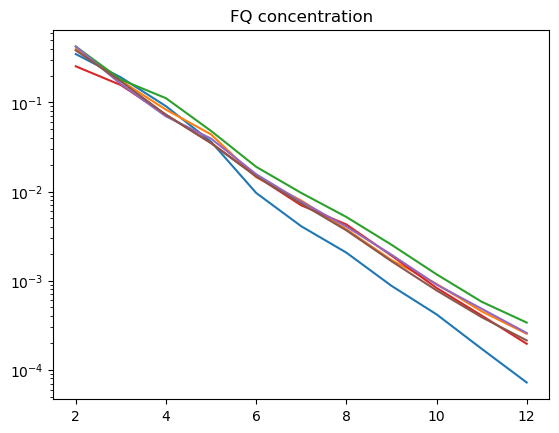

In [44]:
plt.plot(n_range,np.median(k_ZZ,axis=2).T)
plt.yscale('log')
plt.title('FQ concentration')
plt.show()

In [46]:
best_qubits = [2, 2, 7, 9, 6, 6]
fits_kappa = np.empty((np.median(k_ZZ,axis=2).shape[0],2))

for i in range(np.median(k_ZZ,axis=2).shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_kappa[i,0], fits_kappa[i,1] = fit_exponential_n(np.median(k_ZZ[i],axis=1), best_qubit=best_qubits[i], show_plot=False)

print(fits_kappa)

[[-1.25367831  2.29461957]
 [-1.0746387   1.58520772]
 [-0.99255777  1.21084257]
 [-1.08858132  1.64465162]
 [-0.99664029  0.97877125]
 [-1.03719938  1.103077  ]]


In [48]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

kappa_extrapolation = np.array([fits_kappa[i,1]*np.power(2, fits_kappa[i,0]*n_extrapolation) for i in range(np.median(k_ZZ,axis=2).shape[0])])
kappa_ZZ = np.median(k_ZZ,axis=2)

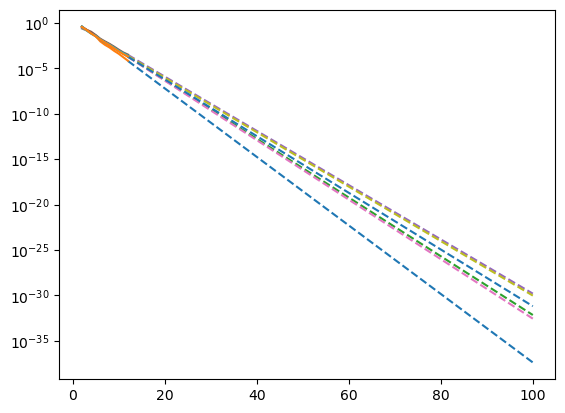

In [49]:
for i in range(kappa_extrapolation.shape[0]):
    plt.plot(n_extrapolation, kappa_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, kappa_ZZ[i])
plt.yscale('log')
plt.show()

## Success rate

In [12]:
P_SR = 0.99

In [13]:
def N_SR(kappa,P_SR):
    return(np.log(1-P_SR)/np.log(1-kappa))

In [50]:
NSRs_ZZ = np.log(1-P_SR)/np.log(1-np.median(k_ZZ,axis=2))

In [51]:
best_qubits = [2,2,7,9,6,6]
fits_N_SR = np.empty((np.median(k_ZZ,axis=2).shape[0],2))

for i in range(np.median(k_ZZ,axis=2).shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_N_SR[i,0], fits_N_SR[i,1] = fit_exponential_n(NSRs_ZZ[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_N_SR)

[[1.2750547  1.74698285]
 [1.09768391 2.50143489]
 [0.9938343  3.76531344]
 [1.08898306 2.79074659]
 [0.99829229 4.64646536]
 [1.03876444 4.12574738]]


In [52]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

NSRs_extrapolation = np.array([fits_N_SR[i,1]*np.power(2, fits_N_SR[i,0]*n_extrapolation) for i in range(NSRs_ZZ.shape[0])])

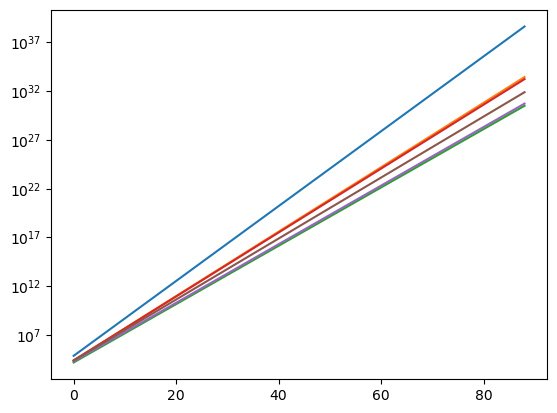

In [53]:
plt.plot(NSRs_extrapolation.T)
plt.yscale('log')

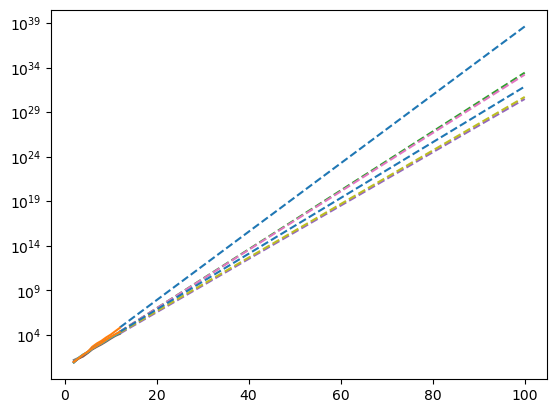

In [54]:
for i in range(NSRs_extrapolation.shape[0]):
    plt.plot(n_extrapolation, NSRs_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, NSRs_ZZ[i])
plt.yscale('log')
plt.show()

## Spread

In [55]:
from lib.tools import filter_n, filter_r
from lib.spread_N_estimation import V_k, N_spread

In [56]:
P_spread = 0.99

### Delta_ensemble

In [57]:
k_IQRS = iqr(k_ZZ, axis=2)

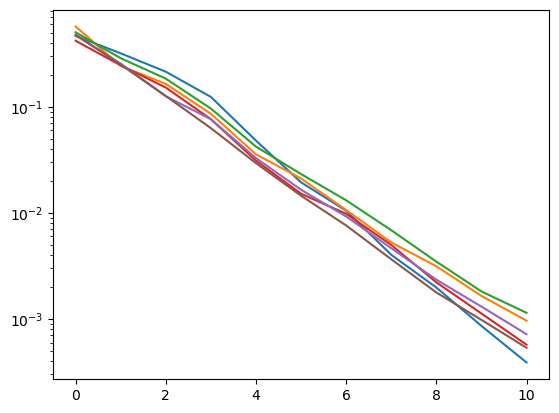

In [58]:
plt.plot(k_IQRS.T)
plt.yscale('log')

In [59]:
best_qubits = [6,2,7,6,6,6]
fits_Delta_ensemble = np.empty((k_IQRS.shape[0],2))

for i in range(k_IQRS.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_Delta_ensemble[i,0], fits_Delta_ensemble[i,1] = fit_exponential_n(k_IQRS[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_Delta_ensemble)

[[-1.15083568  5.60577445]
 [-0.92488474  1.89336874]
 [-0.89287291  1.77777839]
 [-0.96170197  1.78119601]
 [-0.92242865  1.48636979]
 [-0.97142295  1.62038871]]


In [60]:
n_extrapolation_max = 100
n_extrapolation = np.arange(n_range[-1], n_extrapolation_max+0.1,1)

Delta_extrapolation = np.array([fits_Delta_ensemble[i,1]*np.power(2, fits_Delta_ensemble[i,0]*n_extrapolation) for i in range(k_IQRS.shape[0])])

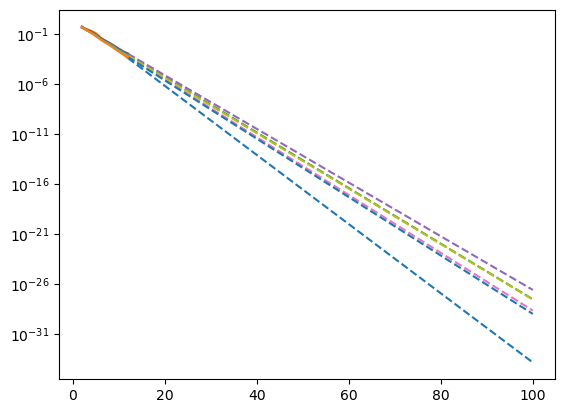

In [61]:
for i in range(Delta_extrapolation.shape[0]):
    plt.plot(n_extrapolation, Delta_extrapolation[i], linestyle='dashed')
    plt.plot(n_range, k_IQRS[i])
plt.yscale('log')
plt.show()

## N_spread

In [62]:
def N_spread(kappa, Delta, P_spread, epsilon=1):
    return((kappa*(1-kappa))/((1-P_spread)*np.power(epsilon*Delta,2)))

In [63]:
Ns_spread = np.empty(kappa_ZZ.shape)

for i in range(kappa_ZZ.shape[0]):
    kappa = kappa_ZZ[i]
    Delta = k_IQRS[i]
    Ns_spread[i] = N_spread(kappa, Delta, P_spread)

In [64]:
best_qubits = [2,2,7,6,6,6]
fits_N_spread = np.empty((Ns_spread.shape[0],2))

for i in range(Ns_spread.shape[0]):
    #show_elbow_n(Ns_ZZ[i], best_qubit=best_qubits[i])
    fits_N_spread[i,0], fits_N_spread[i,1] = fit_exponential_n(Ns_spread[i], best_qubit=best_qubits[i], show_plot=False)

print(fits_N_spread)

[[ 0.92784535 15.34257625]
 [ 0.8227891  32.46296683]
 [ 0.79574303 37.55021864]
 [ 0.87918428 37.65728119]
 [ 0.85152479 43.20479589]
 [ 0.90878003 41.02818687]]


In [65]:
Ns_spread_extrapolated = np.empty((Ns_spread.shape[0], n_extrapolation.shape[0]))

for ZZ_id, _ in enumerate(Ns_spread):
    for n_id, _ in enumerate(n_extrapolation):
        n = n_extrapolation[n_id]
        kappa_ext = kappa_extrapolation[ZZ_id,n_id]
        Delta_ext = Delta_extrapolation[ZZ_id,n_id]
        Ns_spread_extrapolated[ZZ_id, n_id] = N_spread(kappa_ext,Delta_ext, P_spread) 

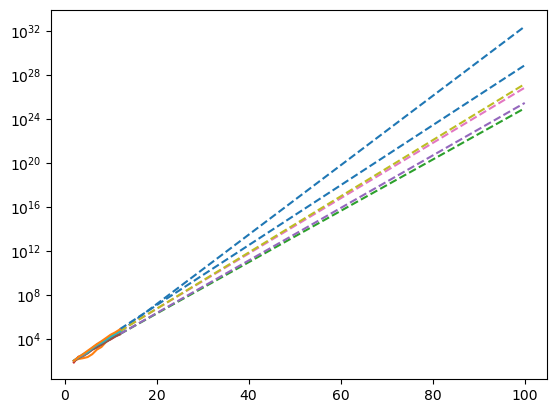

In [66]:
for i in range(Ns_spread_extrapolated.shape[0]):
    plt.plot(n_extrapolation, Ns_spread_extrapolated[i], linestyle='dashed')
    plt.plot(n_range, Ns_spread[i])
plt.yscale('log')
plt.show()

# PQ

# Together

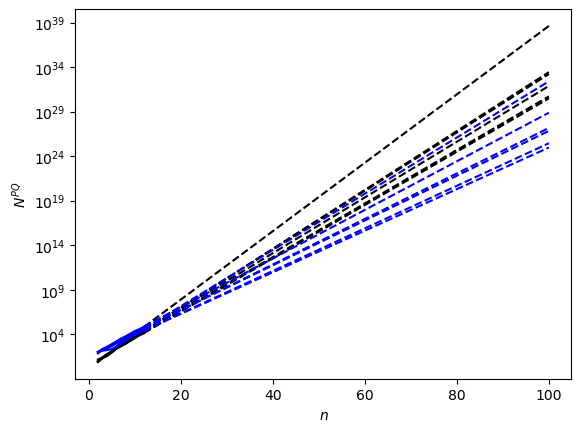

In [67]:
color = cm.rainbow(np.linspace(0, 1, NSRs_extrapolation.shape[0]))

for i in range(NSRs_extrapolation.shape[0]):
    plt.plot(n_extrapolation, NSRs_extrapolation[i], linestyle='dashed', c = 'black')
    plt.plot(n_range, NSRs_ZZ[i], c = 'black')
for i in range(Ns_spread_extrapolated.shape[0]):
    plt.plot(n_extrapolation, Ns_spread_extrapolated[i], linestyle='dashed', c = 'blue')
    plt.plot(n_range, Ns_spread[i], c = 'blue')
plt.yscale('log')
#plt.xlim((2,20))
#plt.ylim((0,1.e10))
plt.xlabel(r'$n$')
plt.ylabel(r'$N^{PQ}$')
plt.show()

In [68]:
step = 5

n_ext_plot = n_extrapolation[::step]
NSR_ext_plot = NSRs_extrapolation[:,::step]
Ns_spread_ext_plot = Ns_spread_extrapolated[:,::step]

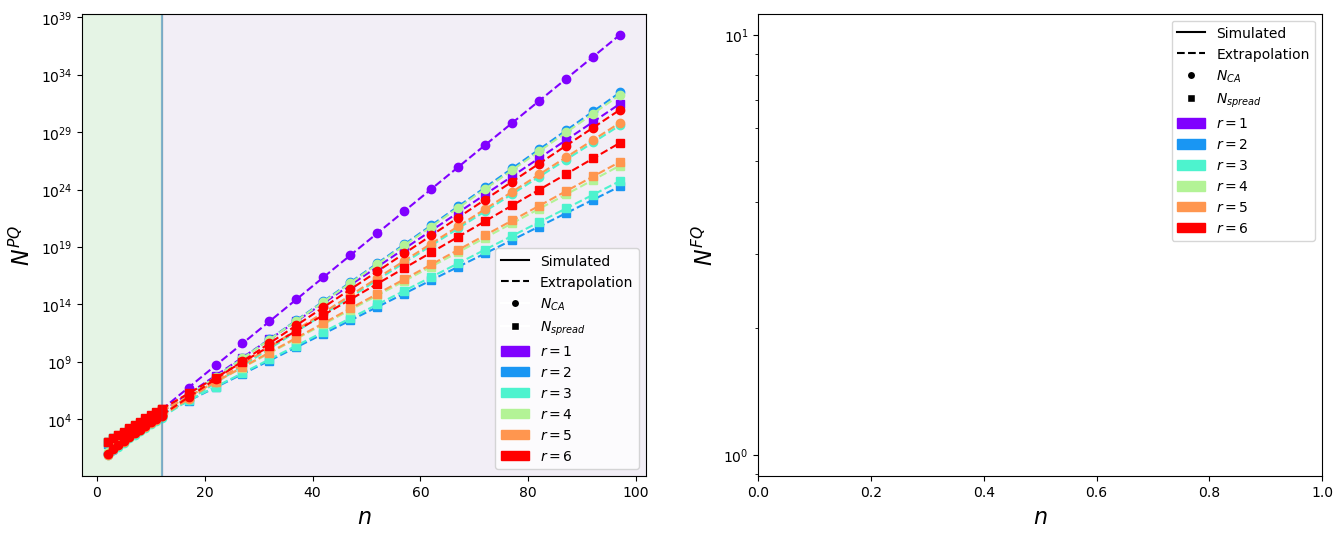

In [71]:
color = cm.rainbow(np.linspace(0, 1, NSRs_extrapolation.shape[0]))

bg_color = [plt.cm.Accent(i) for i in range(2)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

legend_entries = []

legend_entries.append(Line2D([], [], color='black', linestyle='-', label='Simulated'))
legend_entries.append(Line2D([], [], color='black', linestyle='--', label='Extrapolation'))
legend_entries.append( Line2D([], [], color="white", marker='o', markerfacecolor="black", label=r'$N_{CA}}$'))
legend_entries.append( Line2D([], [], color="white", marker='s', markerfacecolor="black", label=r'$N_{spread}}$'))

for i, c in enumerate(color):
    ax[0].plot(n_range,NSRs_ZZ[i], c=c, marker='o')
    ax[0].plot(n_ext_plot, NSR_ext_plot[i], c=c, marker='o', linestyle = '--')
    ax[0].plot(n_range,Ns_spread[i], c=c, marker='s')
    ax[0].plot(n_ext_plot, Ns_spread_ext_plot[i], c=c, marker='s', linestyle = '--')

    ax[0].axvline(n_range[-1], alpha=0.1)

    legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

left,right = ax[0].get_xlim()

ax[0].axvspan(-10, n_range[-1], alpha=0.2, color=bg_color[0])
ax[0].axvspan(n_range[-1], n_extrapolation[-1]+10, alpha=0.2, color=bg_color[1])

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xlim((left,right))
#ax[1].set_ylim((1,1.e15))

ax[1].set_xlabel(r'$n$', fontsize=16)
ax[0].set_xlabel(r'$n$', fontsize=16)
#ax[0].set_xticks([int(i) for i in x_full if i%2==0])
#ax[1].set_xticks([int(i) for i in x_full if i%2==0])
ax[1].set_ylabel(r'$N^{FQ}$', fontsize=16)
ax[0].set_ylabel(r'$N^{PQ}$', fontsize=16)


ax[0].legend(handles=legend_entries)
ax[1].legend(handles=legend_entries)

plt.show()

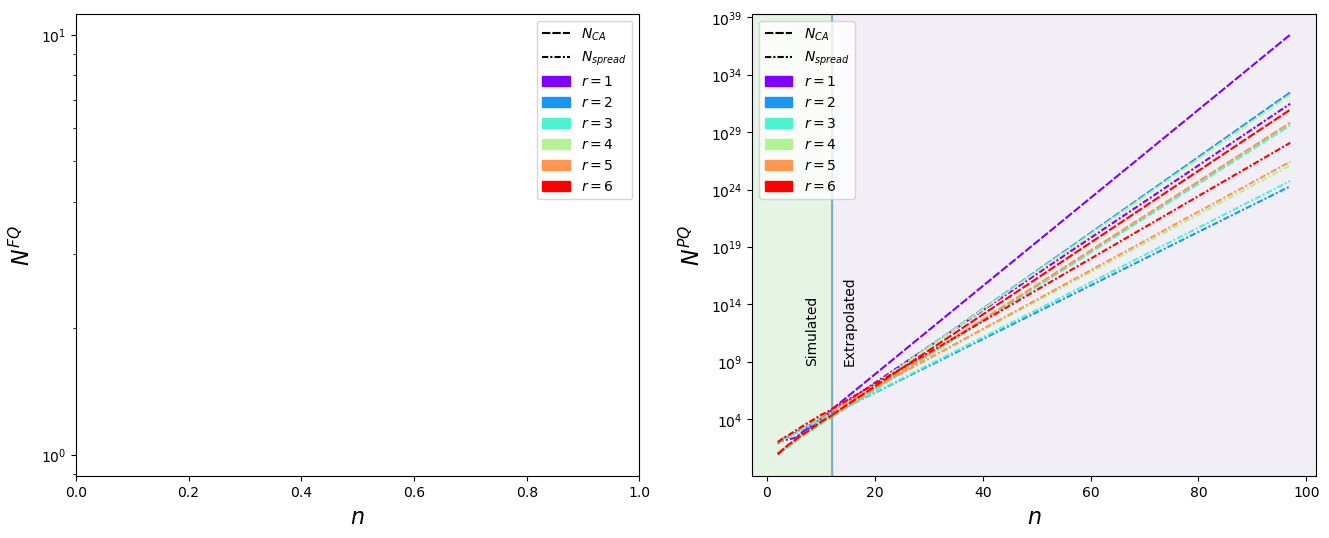

In [72]:
color = cm.rainbow(np.linspace(0, 1, NSRs_extrapolation.shape[0]))

bg_color = [plt.cm.Accent(i) for i in range(2)]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

legend_entries = []

legend_entries.append(Line2D([], [], color='black', linestyle=(0, (4, 1)), label=r'$N_{CA}}$'))
legend_entries.append(Line2D([], [], color='black', linestyle=(0, (3, 1, 1, 1)), label=r'$N_{spread}}$'))
#legend_entries.append( Line2D([], [], color="white", marker='o', markerfacecolor="black", label=r'$N_{SR}}$'))
#legend_entries.append( Line2D([], [], color="white", marker='s', markerfacecolor="black", label=r'$N_{spread}}$'))

for i, c in enumerate(color):
    ax[1].plot(n_range,NSRs_ZZ[i], c=c, linestyle = (0, (4, 1)))
    ax[1].plot(n_ext_plot, NSR_ext_plot[i], c=c, linestyle = (0, (4, 1)))
    ax[1].plot(n_range,Ns_spread[i], c=c, linestyle = (0, (3, 1, 1, 1)))
    ax[1].plot(n_ext_plot, Ns_spread_ext_plot[i], c=c, linestyle = (0, (3, 1, 1, 1)))

    ax[1].axvline(n_range[-1], alpha=0.1)

    legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

left,right = ax[1].get_xlim()

ax[1].axvspan(-10, n_range[-1], alpha=0.2, color=bg_color[0])
ax[1].axvspan(n_range[-1], n_extrapolation[-1]+10, alpha=0.2, color=bg_color[1])

ax[1].text(n_range[-1]-5,1.e9,'Simulated', rotation='vertical')
ax[1].text(n_range[-1]+2,1.e9,'Extrapolated', rotation='vertical')

ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[1].set_xlim((left,right))
#ax[1].set_ylim((1,1.e15))

ax[0].set_xlabel(r'$n$', fontsize=16)
ax[1].set_xlabel(r'$n$', fontsize=16)
#ax[0].set_xticks([int(i) for i in x_full if i%2==0])
#ax[1].set_xticks([int(i) for i in x_full if i%2==0])
ax[0].set_ylabel(r'$N^{FQ}$', fontsize=16)
ax[1].set_ylabel(r'$N^{PQ}$', fontsize=16)


ax[0].legend(handles=legend_entries)
ax[1].legend(handles=legend_entries, loc='upper left')

plt.show()

### Success rate export

In [182]:
N_data = np.array([n_range, NSRs_ZZ[0],NSRs_ZZ[1],NSRs_ZZ[2],NSRs_ZZ[3],NSRs_ZZ[4],NSRs_ZZ[5]]).T
N_data_ext = np.array([n_extrapolation, NSRs_extrapolation[0],NSRs_extrapolation[1],NSRs_extrapolation[2],NSRs_extrapolation[3],NSRs_extrapolation[4],NSRs_extrapolation[5]]).T
df = pd.DataFrame(N_data, columns=['n', 'ZZ1', 'ZZ2', 'ZZ3', 'ZZ4', 'ZZ5', 'ZZ6'])
df_ext = pd.DataFrame(N_data_ext, columns=['n', 'ZZ1', 'ZZ2', 'ZZ3', 'ZZ4', 'ZZ5', 'ZZ6'])
df_ext

,n,ZZ1,ZZ2,ZZ3,ZZ4,ZZ5,ZZ6
0,12.0,7.044309e+02,7.078651e+03,1.626469e+04,1.964720e+04,2.180483e+04,2.264394e+04
1,13.0,1.059775e+03,1.329787e+04,3.167258e+04,3.893137e+04,4.443561e+04,4.623360e+04
2,14.0,1.594370e+03,2.498124e+04,6.167670e+04,7.714335e+04,9.055440e+04,9.439815e+04
3,15.0,2.398637e+03,4.692947e+04,1.201044e+05,1.528612e+05,1.845389e+05,1.927388e+05
4,16.0,3.608610e+03,8.816117e+04,2.338818e+05,3.028979e+05,3.760680e+05,3.935274e+05
...,...,...,...,...,...,...,...
84,96.0,5.589473e+17,7.109103e+26,3.342016e+28,1.742633e+29,2.039577e+30,2.485632e+30
85,97.0,8.409037e+17,1.335508e+27,6.507980e+28,3.453066e+29,4.156412e+30,5.075076e+30
86,98.0,1.265091e+18,2.508870e+27,1.267313e+29,6.842326e+29,8.470266e+30,1.036211e+31
87,99.0,1.903255e+18,4.713136e+27,2.467866e+29,1.355822e+30,1.726138e+31,2.115700e+31


In [183]:
df.to_csv('results/N_estimates/SR_FQ', index=False)
df_ext.to_csv('results/N_estimates/SR_FQ_ext', index=False)

### Spread export

In [184]:
N_data = np.array([n_range, Ns_spread[0],Ns_spread[1],Ns_spread[2],Ns_spread[3],Ns_spread[4],Ns_spread[5]]).T
N_data_ext = np.array([n_extrapolation, Ns_spread_extrapolated[0],Ns_spread_extrapolated[1],Ns_spread_extrapolated[2],Ns_spread_extrapolated[3],Ns_spread_extrapolated[4],Ns_spread_extrapolated[5]]).T
df = pd.DataFrame(N_data, columns=['n', 'ZZ1', 'ZZ2', 'ZZ3', 'ZZ4', 'ZZ5', 'ZZ6'])
df_ext = pd.DataFrame(N_data_ext, columns=['n', 'ZZ1', 'ZZ2', 'ZZ3', 'ZZ4', 'ZZ5', 'ZZ6'])
df_ext

,n,ZZ1,ZZ2,ZZ3,ZZ4,ZZ5,ZZ6
0,12.0,5.985955e+03,5.449275e+04,1.275827e+05,1.681570e+05,1.860670e+05,1.903887e+05
1,13.0,7.470903e+03,9.934939e+04,2.457273e+05,3.466728e+05,3.821571e+05,3.889893e+05
2,14.0,9.317576e+03,1.811046e+05,4.732447e+05,7.146604e+05,7.848575e+05,7.947147e+05
3,15.0,1.161512e+04,3.301113e+05,9.113879e+05,1.473218e+06,1.611863e+06,1.623579e+06
4,16.0,1.447450e+04,6.016902e+05,1.755145e+06,3.036882e+06,3.310240e+06,3.316884e+06
...,...,...,...,...,...,...,...
84,96.0,6.081343e+11,4.312125e+26,1.029100e+29,4.118999e+31,3.326127e+31,2.192052e+31
85,97.0,7.573284e+11,7.859276e+26,1.981798e+29,8.490752e+31,6.830692e+31,4.478188e+31
86,98.0,9.431244e+11,1.432431e+27,3.816463e+29,1.750252e+32,1.402784e+32,9.148581e+31
87,99.0,1.174502e+12,2.610747e+27,7.349583e+29,3.607905e+32,2.880823e+32,1.868982e+32


In [185]:
df.to_csv('results/N_estimates/Spread_FQ', index=False)
df_ext.to_csv('results/N_estimates/Spread_FQ_ext', index=False)